# Assignment: Exploratory Data Analysis
## Do two. You might want to refer to your work for the data wrangling assignment.

In [103]:
! git clone https://github.com/carascott/visualization

fatal: destination path 'visualization' already exists and is not an empty directory.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
# Q1-1
df = pd.read_csv('/content/visualization/assignment/data/college_completion.csv',low_memory=False)

In [106]:
# Q1-2
print(df.shape, '\n')
print(df.head(),'\n')
print(df.columns)
# 3798 observations and 63 variables/columns. Variable names include city, state, level, control, etc.

(3798, 63) 

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ..

In [107]:
# Q1-3
print(pd.crosstab(df['control'], df['level']),'\n')
print(pd.crosstab(df['control'], df['level'], normalize = 'all'))
# Private NFP 4-year schools are the most abundant, while private NFP 2-year
# schools are the least abundant. By calculating percentages, I can see these
# patterns more easily. The public schools do make up a decent portion of this group,
# 24% 2-year and 17% 4-year, but private schools are the majority.

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403


<Axes: xlabel='grad_100_value', ylabel='Count'>

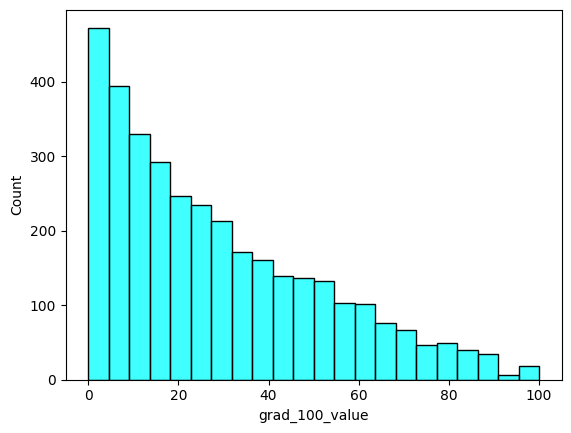

In [108]:
# Q1-4
sns.histplot(df['grad_100_value'], color="cyan")

<Axes: xlabel='grad_100_value', ylabel='Density'>

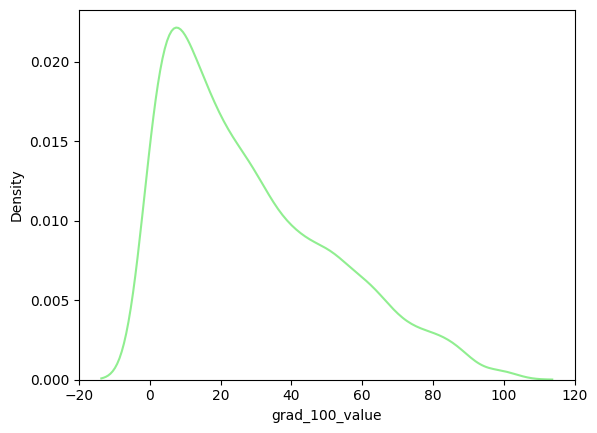

In [109]:
sns.kdeplot(df['grad_100_value'], color="lightgreen")

<Axes: ylabel='grad_100_value'>

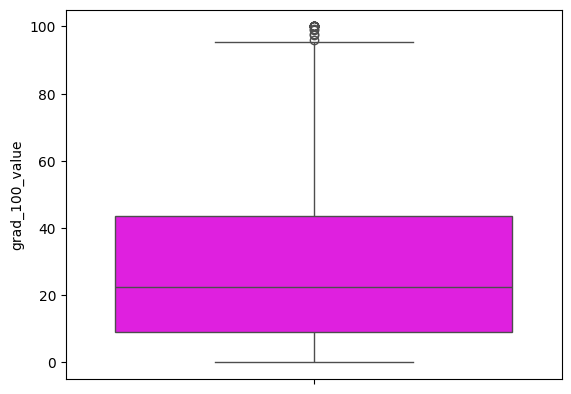

In [110]:
sns.boxplot(df['grad_100_value'], color="magenta")

In [111]:
df['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

<Axes: xlabel='grad_100_value', ylabel='Density'>

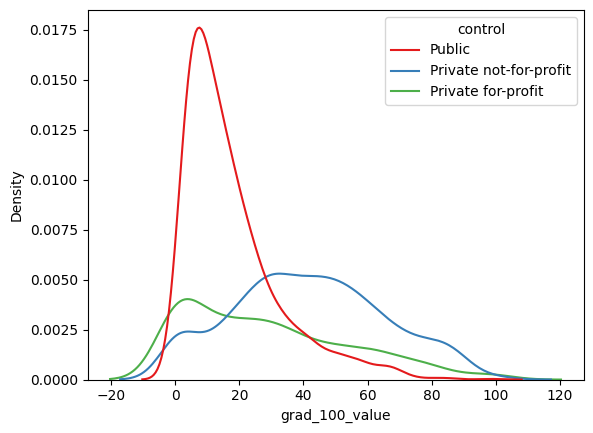

In [112]:
# Q1-5
sns.kdeplot(data=df,x='grad_100_value',hue='control', palette="Set1")
# The majority of public schools have relatively low graduation rates,
#, and a clear node can be seen around 10 grad_100_value. Private schools
# tend to have much higher graduation rates, in particular, Private NFP schools.

<Axes: xlabel='grad_100_value', ylabel='Density'>

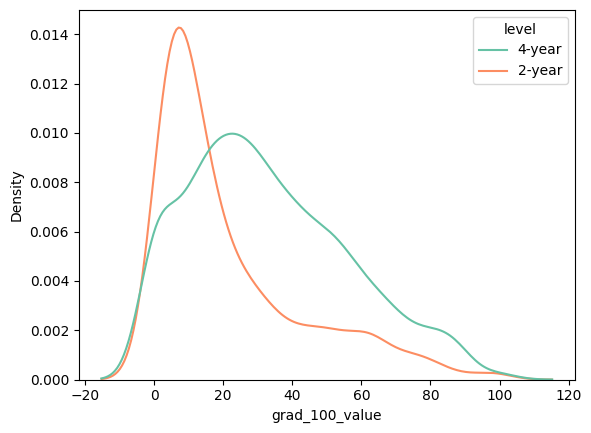

In [113]:
sns.kdeplot(data=df,x='grad_100_value',hue='level', palette="Set2")
# 2-year schools are showing much lower graduation rates.

In [114]:
df.loc[:,['control','grad_100_value']].groupby('control').describe()
# The graduation rate is significantly higher for private NFP schools (42%)
# than private FP schools (29%).

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [115]:
df.loc[:,['level','grad_100_value']].groupby('level').describe()
# Graduation rates are 10% higher in 4-year than 2-year schools.

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

<Axes: xlabel='grad_100_value', ylabel='Density'>

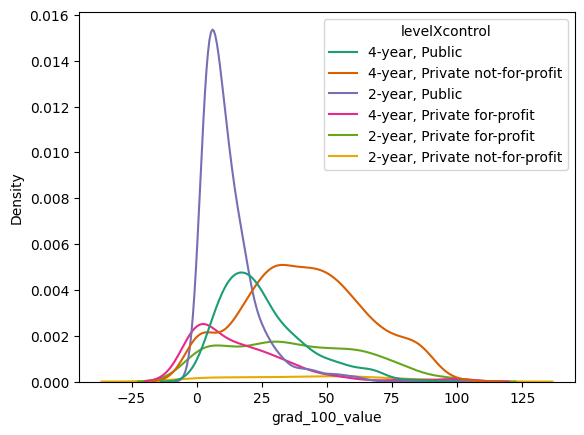

In [116]:
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol', palette="Dark2")
# The highest density is seen amongst the 2-year public schools.
#These values are concentrated around 10% grad_100_value.
# The private schools are showing much more consistent graduation rates and at much higher rates.
#4-year private NFP has a its node(s) around 25-50%, fairing much higher.

<Axes: xlabel='aid_arcsinh', ylabel='Density'>

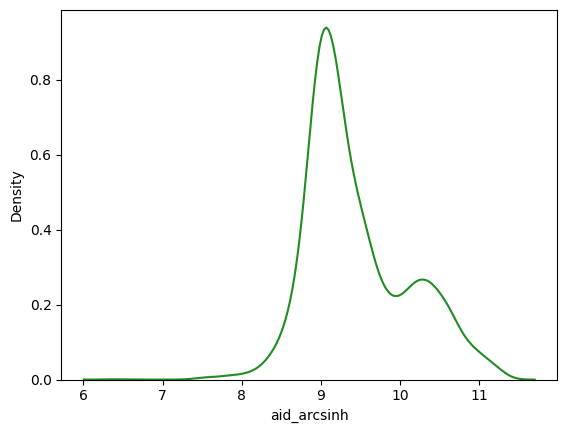

In [117]:
df['aid_arcsinh'] = np.arcsinh(df['aid_value'])
sns.kdeplot(data=df,x='aid_arcsinh', color="forestgreen")

<Axes: xlabel='aid_value', ylabel='Density'>

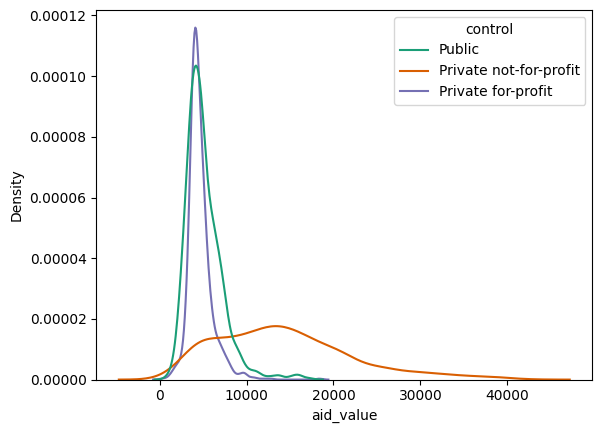

In [118]:
sns.kdeplot(data=df,x='aid_value',hue='control', palette="Dark2")

<Axes: xlabel='aid_value', ylabel='Density'>

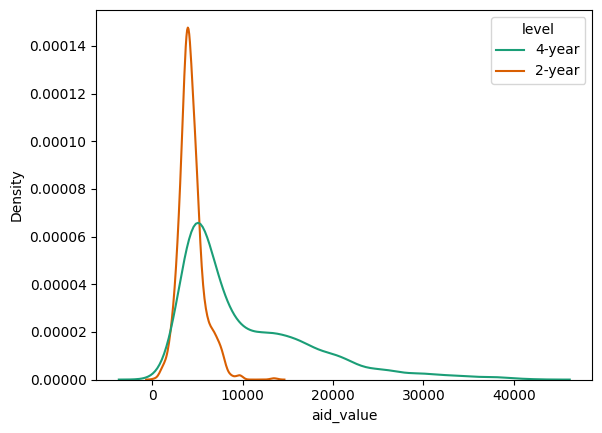

In [119]:
sns.kdeplot(data=df,x='aid_value',hue='level', palette="Dark2")

In [120]:
df.loc[:,['control','aid_value']].groupby('control').describe()
# The maximum aid value amongst all of the 3 is from private NFP schools at 41580.
# Private NFP tends to give out the most aid, presumably due to high tuition costs.

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [121]:
df.loc[:,['level','aid_value']].groupby('level').describe()
# 4-year schools give more aid than 2-year schools, potentially due to the
# longevity of an investment in a student that is giving students financial aid.

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

<Axes: xlabel='grad_100_value', ylabel='Density'>

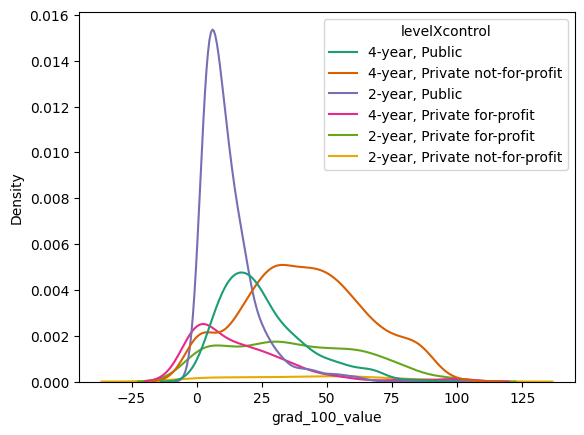

In [122]:
# Q1-6
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol', palette="Dark2")
# The 3 biggest takeaways from this graph is the density of 2-year public schools
# and their low graduation rates, and at a lower density,
# the 4-year public schools that only fairing slightly better rates.
# Public school seems to have the worst rates, and 4-year private NFP
# schools show the highest rates, those students fairing most likely to graduate
# than when compared to other schools on this graph.

<Axes: xlabel='aid_value', ylabel='Density'>

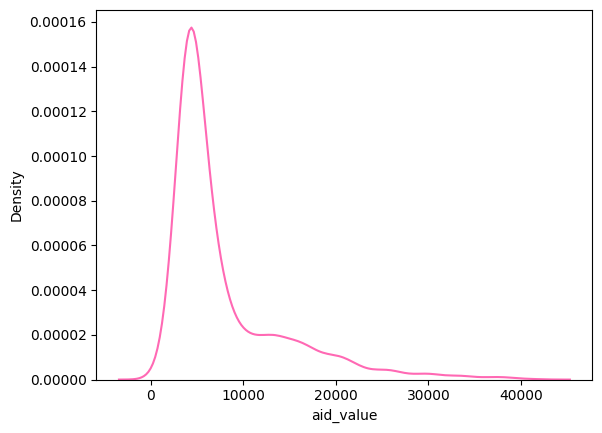

In [123]:
# Q1-7
sns.kdeplot(data=df,x='aid_value', color="hotpink")
#

<Axes: xlabel='aid_value', ylabel='Density'>

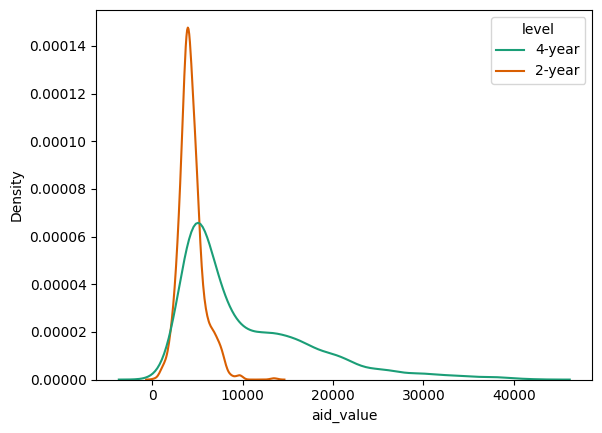

In [124]:
sns.kdeplot(data=df,x='aid_value',hue='level', palette="Dark2")
#The shape here shows that both 4 and 2 year schools have a lower aid_value node followed by a higher aid_value
# node (but less density).

<Axes: xlabel='aid_value', ylabel='Density'>

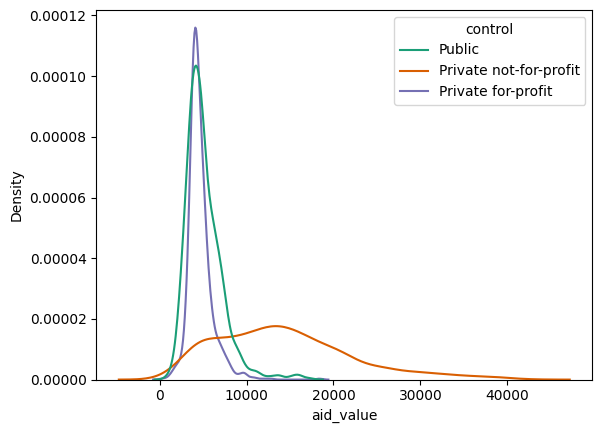

In [125]:
sns.kdeplot(data=df,x='aid_value',hue='control', palette="Dark2")
# The shape here shows that public and private FP schools fair similarly in aid value given.
# This could be due to NFP schools allowing for greater aid to be given,
# whereas public and private NP may fair similarly in terms of money greed.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

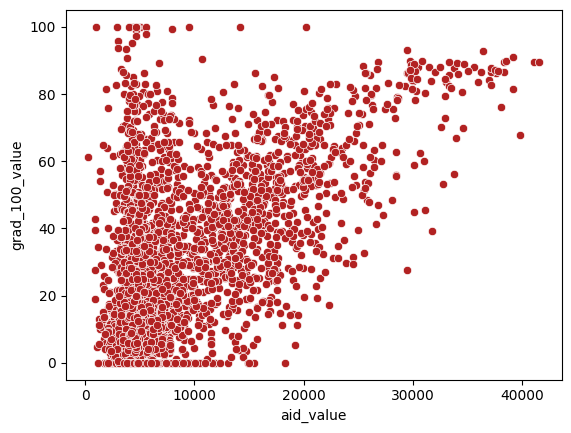

In [126]:
# Q1-8
sns.scatterplot(data=df,x='aid_value',y='grad_100_value', color="firebrick")
# There is a noticable trend on the graph where aid_value increases with
# grad_100_value, but this is not true for higher numerical values.
# The outliers in the top left of the graph suggest that some schools with
# high (almost 100%) graduation rates still are giving almost no financial
# aid to students, despite the clear success most of them have in graduating.


<Axes: xlabel='aid_value', ylabel='grad_100_value'>

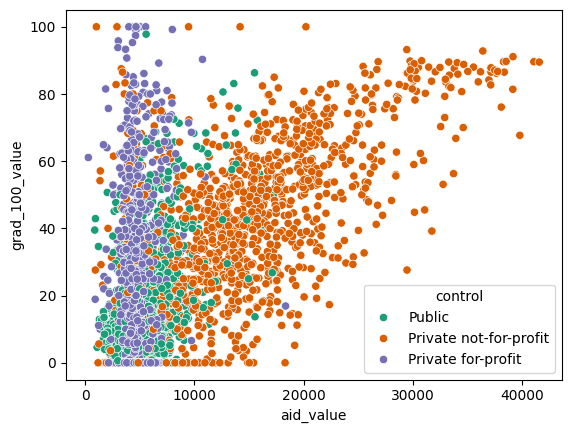

In [127]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='control', palette="Dark2")
# Most of the outliers that I identified in the top left corner are from private
# FP schools. They could be more stingy with their money and not allocate
# much aid to students. Private NFP schools tend to give the highest aid values.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

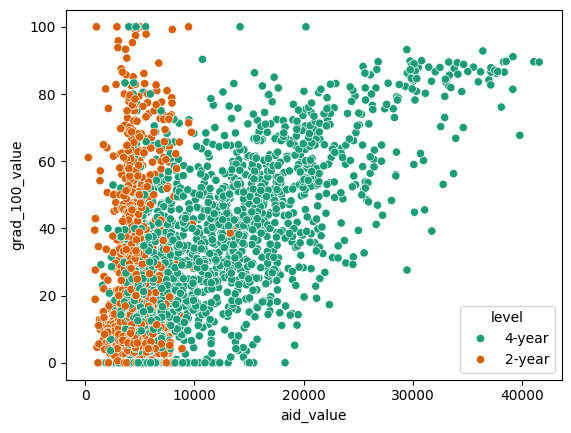

In [128]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='level', palette="Dark2")
# As expected, the most aid is given by 4-year institutions, presumably due to
# the increased cost of attending a 4-year school.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [130]:
# Q2-1
cdf = pd.read_csv('/content/visualization/assignment/data/airbnb_hw.csv')
price = cdf['Price']
price = price.str.replace(',','')
price = pd.to_numeric(price,errors='coerce')
cdf['Price'] = price

In [138]:
# Q2-2
print(cdf.shape)
cdf.head()
print(cdf.columns)
# 3798 observations, 65 columns/variables. Variables include Host ID, Host Since,
# Name, Neighbourhood, Zipcode, etc.

(30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


In [143]:
# Q2-3
pd.crosstab(cdf['Property Type'],cdf['Room Type'])
# For a place such as a Bed & Breakfast, it makes sense why so few of the
# rentals would be of the entire home/apartment because that is just how Bed and Breakfasts
# work! For things such as boats, bungalows, and camper/RVs, these also make
# sense why most people would be renting the entire unit, rather than a room/shared-room.
# Houses are also mostly rented by private room as well.

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


<Axes: xlabel='Price', ylabel='Count'>

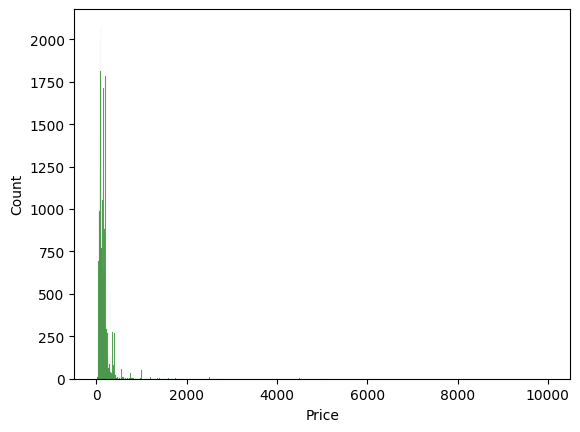

In [145]:
# Q2-4
sns.histplot(data=cdf,x='Price', color="forestgreen")

<Axes: xlabel='Price', ylabel='Density'>

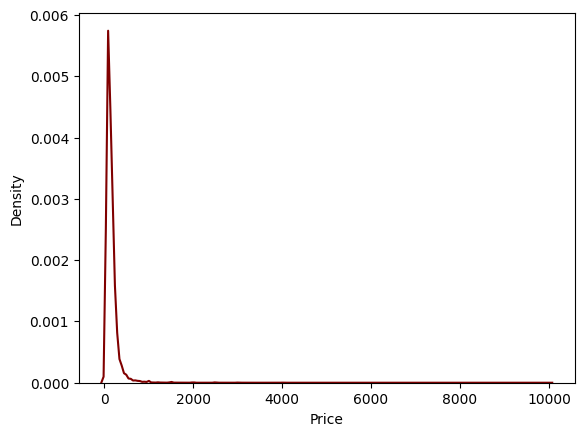

In [148]:
sns.kdeplot(data=cdf,x='Price', color="maroon")

<Axes: xlabel='Price'>

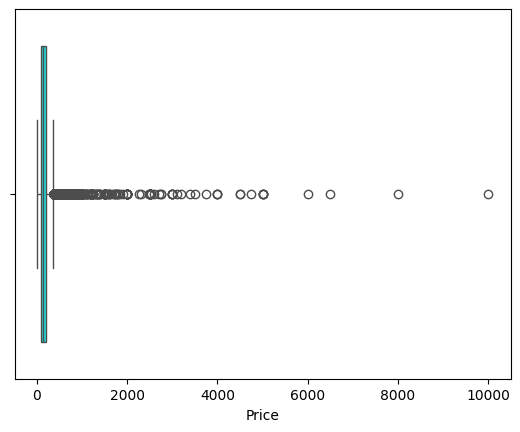

In [149]:
sns.boxplot(data=cdf,x='Price', color="cyan")

In [150]:
cdf['Price'].describe()
# Yes, the data is badly scaled. The range is large and values vary, but the
# data is almost incomprehensible when shown as such.

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

<Axes: xlabel='Price_log', ylabel='Count'>

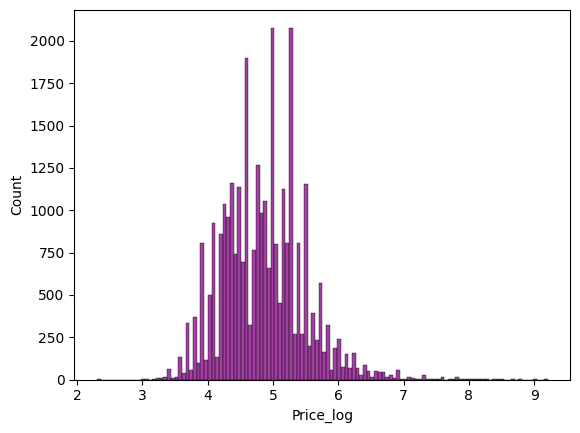

In [153]:
cdf['Price_log'] = np.log(cdf['Price'])
sns.histplot(data=cdf,x='Price_log', color="purple")

<Axes: xlabel='Price_log', ylabel='Density'>

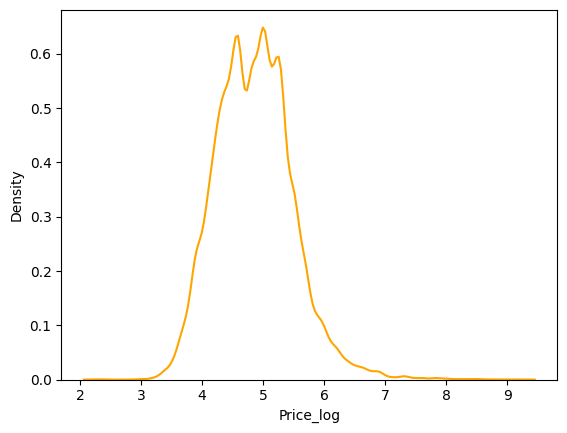

In [154]:
sns.kdeplot(data=cdf,x='Price_log', color="orange")

<Axes: xlabel='Price_log'>

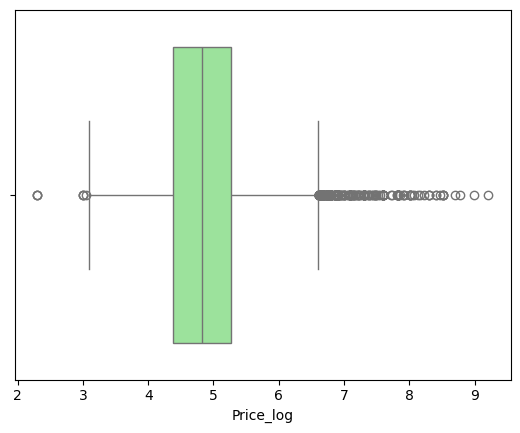

In [161]:
sns.boxplot(data=cdf,x='Price_log', color="lightgreen")
# The data here is much better once logged!

In [163]:
cdf['Price_log'].describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64

<Axes: xlabel='Beds', ylabel='Price_log'>

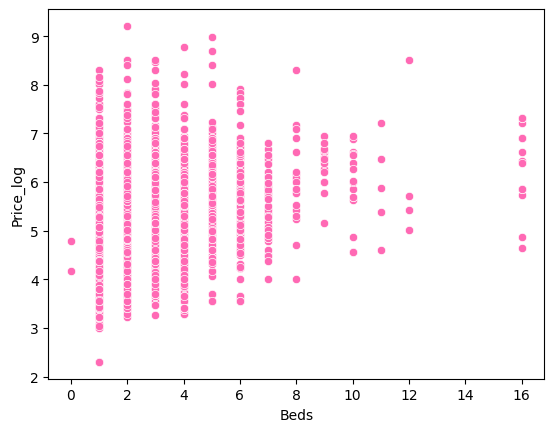

In [168]:
# Q2-5
sns.scatterplot(data=cdf, x='Beds', y='Price_log', color="hotpink")

In [169]:
cdf.loc[:,['Beds','Price']].groupby('Beds').describe()
# The price is increasing as the number of beds go up. This is as expected
# because one could assume as the number of beds increases, the
# square footage and overall quality of the house does too.

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

<Axes: xlabel='Beds', ylabel='Price_log'>

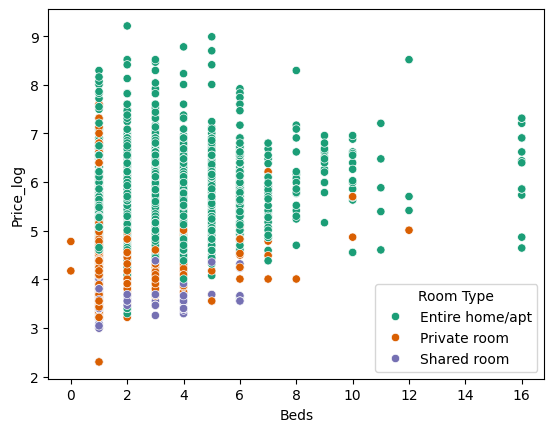

In [171]:
# Q2-6
sns.scatterplot(data=cdf,x='Beds',y='Price_log',hue='Room Type', palette="Dark2")
# The shared rooms are cheaper, while the entire units are more expensive to rent.

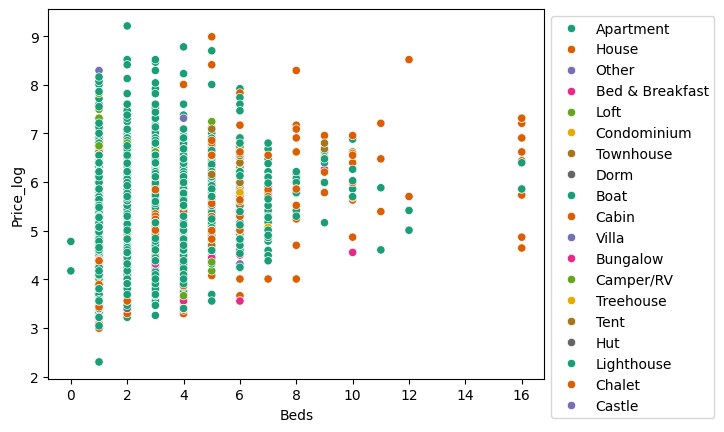

In [175]:
sns.scatterplot(data=cdf,x='Beds',y='Price_log',hue='Property Type', palette="Dark2")
plt.legend(bbox_to_anchor=(1, 1))
# The majority of points on this graph are for apartment rentals. One of the more
# expensive property types are castles (which makes sense but I didn't even know
# you could rent a castle, let alone rent it on Airbnb).

In [176]:
var = 'Price'
group = 'Room Type'
cdf.loc[:,[group,var]].groupby(group).describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

In [177]:
var = 'Price'
group = 'Property Type'
cdf.loc[:,[group,var]].groupby(group).describe()
# One of the most expensive property types is labeled as "other"...
# What is other?

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               753.0  221.960159  271.958145   30.0   80.00  140.0   
Other               47.0  394.659574  696.663423   39.0   82.50  135.0   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          136.0  203.933824  264.178901   45.0   89.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                8.0  328.000000  479.888975   60.0  107.50  187.5   

                                  
                    75%      max  
Property Type                     
Apartment        195.00  10000.0  
Bed & Breakfast  125.00    900.0  
Boat             178.50    250.0  
Bungalow         177.75    195.0  
Cabin            207.50    250.0  
Camper/RV        109.00    325.0  
Castle           150.00    150.0  
Chalet            99.00     99.0  
Condominium      298.75   1990.0  
Dorm              80.00    200.0  
House            150.00   8000.0  
Hut               87.50    100.0  
Lighthouse        39.00     39.0  
Loft             240.00   3000.0  
Other            378.00   4000.0  
Tent             175.00    250.0  
Townhouse        206.25   2500.0  
Treehouse        156.00    300.0  
Villa            224.75   1500.0

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.